# IMAGEN - SUMMARY STATISTICS - SOCIO-ECONOMIC PROFILE

The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points: <br>
<li>Baseline (<b>BL</b>): Age <tr> <b>14</b></li>
<li>Follow 1 year (<b>FU1</b>): Age <b>16</b></li>
<li>Follow 2 year (<b>FU2</b>): Age <b>19</b></li>
<li>Follow 3 year (<b>FU3</b>): Age <b>22</b></li>
<br>
Such in-depth understanding can be achieved by performing follow-up analysis such as Summary Statistics on Socio-economic profile: <br>
<br>
<li> <b>CTQ-SF</b> (Bernstein & Fink, 1997) </li>
<li> <b>LEQ</b> (adapted from Newcomb et al., 1981) </li>
<li> <b>PBQ</b> </li>
<li> <b>CTS</b> </li>
<li> <b>GEN</b> </li>

In [1]:
################################################################################
""" IMAGEN - SUMMARY STATISTICS """
# Author : JiHoon Kim, <jihoon.kim@fu-berlin.de>, 8th September 2021
#
from imagen_instrumentloader import *
from imagen_plot_statistics import *
# DATA_DIR = '/ritter/share/data/IMAGEN'

<h1>Socio_economic_profile</h1>

<h2>CTQ_SF</h2>
The Childhood Trauma Questionnaire (CTQ, Bernstein & Fink, 1997) is a 28-item self-report inventory that provides brief, reliable, and valid screening for histories of abuse and neglect. It inquires about five types of maltreatment - emotional, physical, and sexual abuse, and emotional and physical neglect. Also included is a 3 item Minimization /Denial scale for detecting false-negative trauma reports. The CTQ has been widely and successfully employed in several studies including gene-neuroimaging studies (Caspi et al., 2010). Suitable for adolescents and adults 12+ years.

### newlbls-fu3-espad-fu3-19a-binge-n650 and CTQ

In [2]:
CTQ = IMAGEN_instrument()
binge_CTQ = CTQ.read_instrument(
    'newlbls-fu3-espad-fu3-19a-binge-n650_CTQ.csv'
)
col_binge_CTQ = binge_CTQ.columns[:-6]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.750e-01 stat=-1.358e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.246e-01 stat=-1.216e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=8.093e-02 stat=-1.749e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with

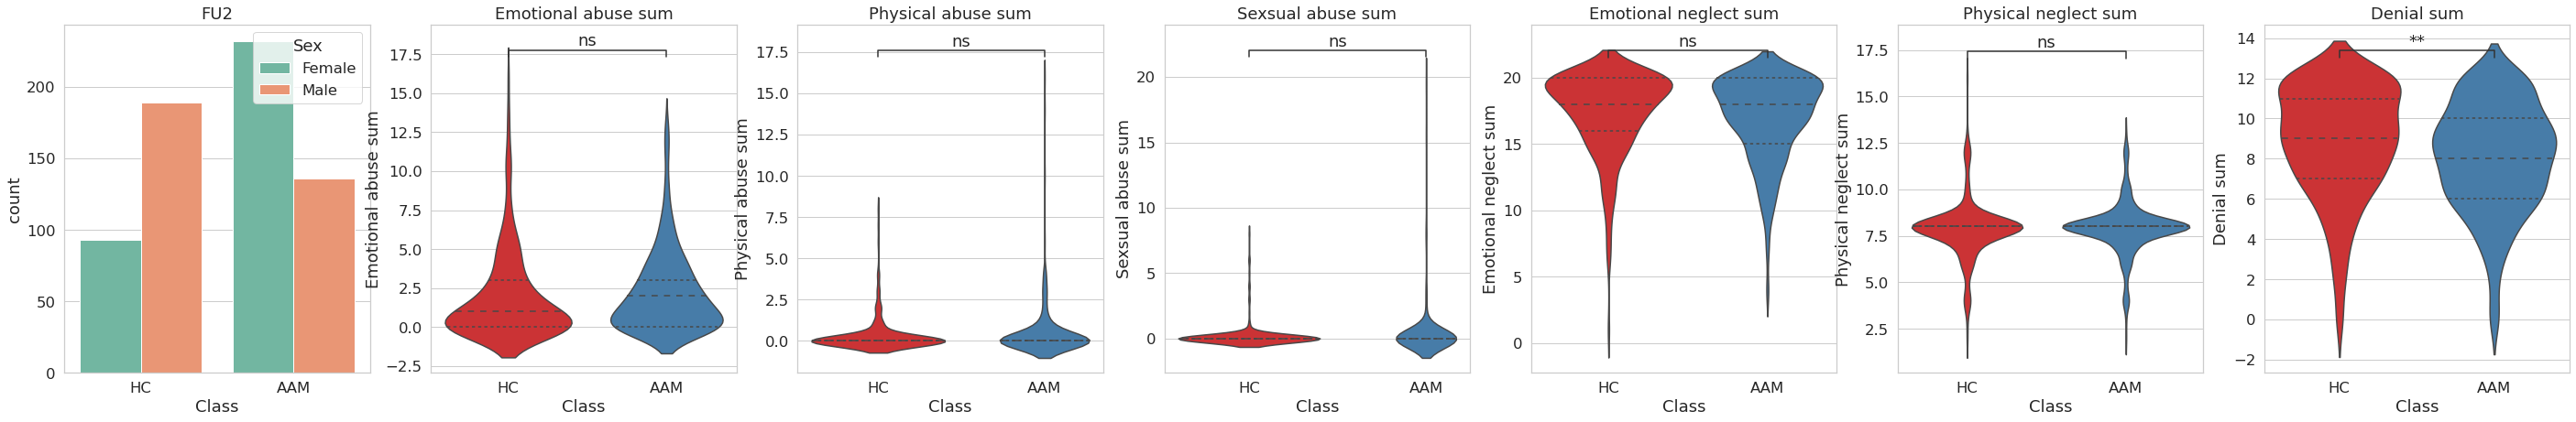

In [3]:
# session plot
for (S, DF) in [('FU2', binge_CTQ)]:
    columns = col_binge_CTQ
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

In [4]:
binge_CTQ.groupby(['Session','Class'])[col_binge_CTQ].mean()

Emotional abuse sum  Physical abuse sum  Sexsual abuse sum  \
Session Class                                                               
FU2     AAM               2.264214            0.484950           0.471572   
        HC                1.939655            0.336207           0.189655   

               Emotional neglect sum  Physical neglect sum  Denial sum  
Session Class                                                           
FU2     AAM                16.933110              7.916388    8.040134  
        HC                 17.344828              7.857759    8.818966

In [5]:
# binge_CTQ.columns = binge_CTQ.columns.str.replace(' ','_')
# pd.crosstab([binge_CTQ.Denial_sum], [binge_CTQ.Class,binge_CTQ.Sex],margins=True)

In [6]:
# DF = df_binge_CTQ
# stat_binge_CTQ = IMAGEN_inference(DF, DF.columns)
# stat_binge_CTQ.violinplot()
# stat_binge_CTQ.inference_statistics()
# stat_binge_CTQ.demographic_plot()

[Back to the CTQ](#CTQ_SF)

[Back to the top](#Socio_economic_profile)

<h2>LEQ</h2>

### newlbls-fu3-espad-fu3-19a-binge-n650 in all session (BL, FU1, FU2, FU3)

In [7]:
LEQ = IMAGEN_instrument()
df_binge_LEQ = LEQ.read_instrument(
    'newlbls-fu3-espad-fu3-19a-binge-n650_LEQ.csv'
)
col_binge_LEQ = df_binge_LEQ.columns[:-6]

In [8]:
binge_LEQ_Session = df_binge_LEQ.groupby(['Session'])
binge_LEQ_BL = binge_LEQ_Session.get_group('BL')
binge_LEQ_FU1 = binge_LEQ_Session.get_group('FU1')
binge_LEQ_FU2 = binge_LEQ_Session.get_group('FU2')
binge_LEQ_FU3 = binge_LEQ_Session.get_group('FU3')

#### Session with Class in Valence

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=8.578e-01 stat=1.793e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=1.861e-01 stat=1.324e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=2.642e-01 stat=-1.118e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with B

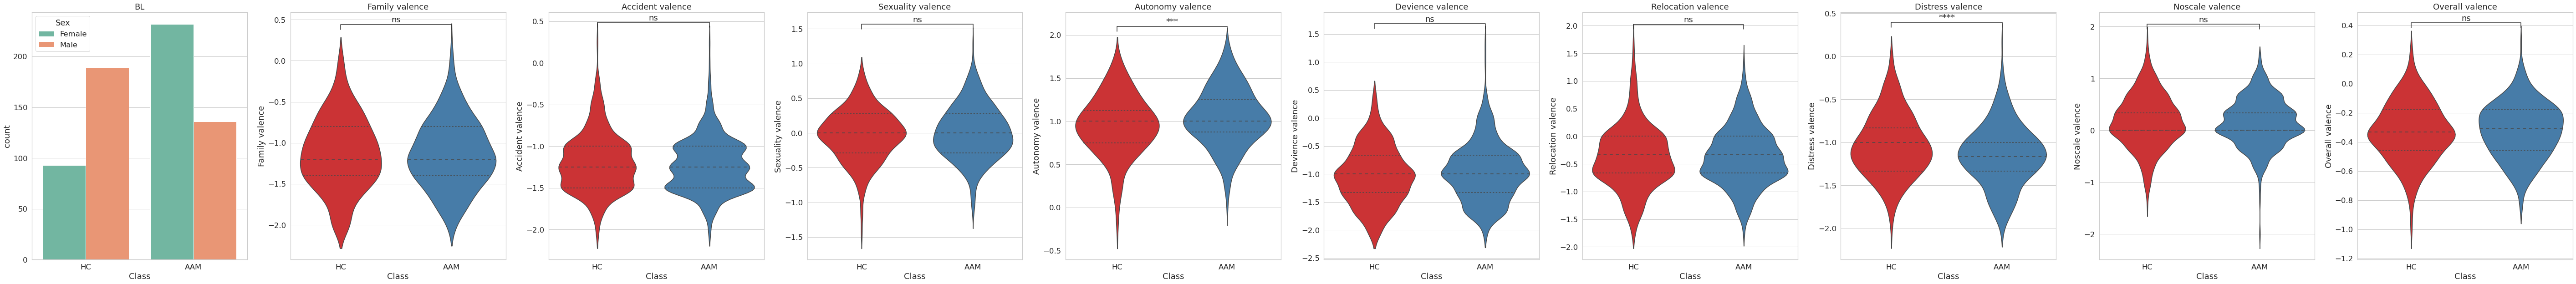

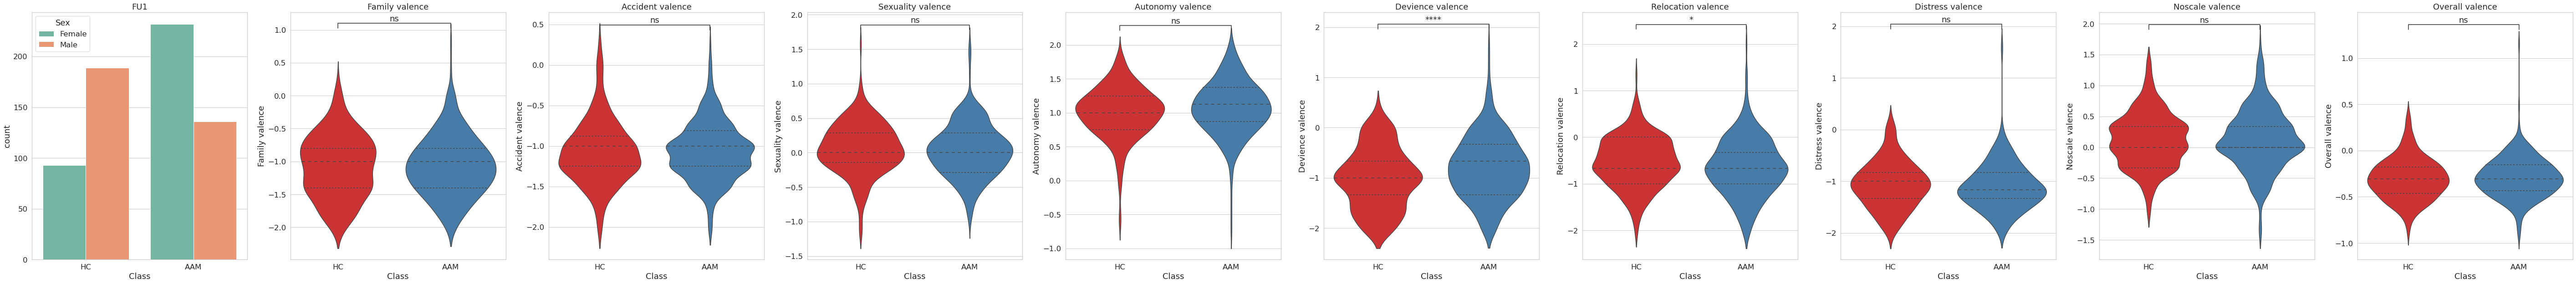

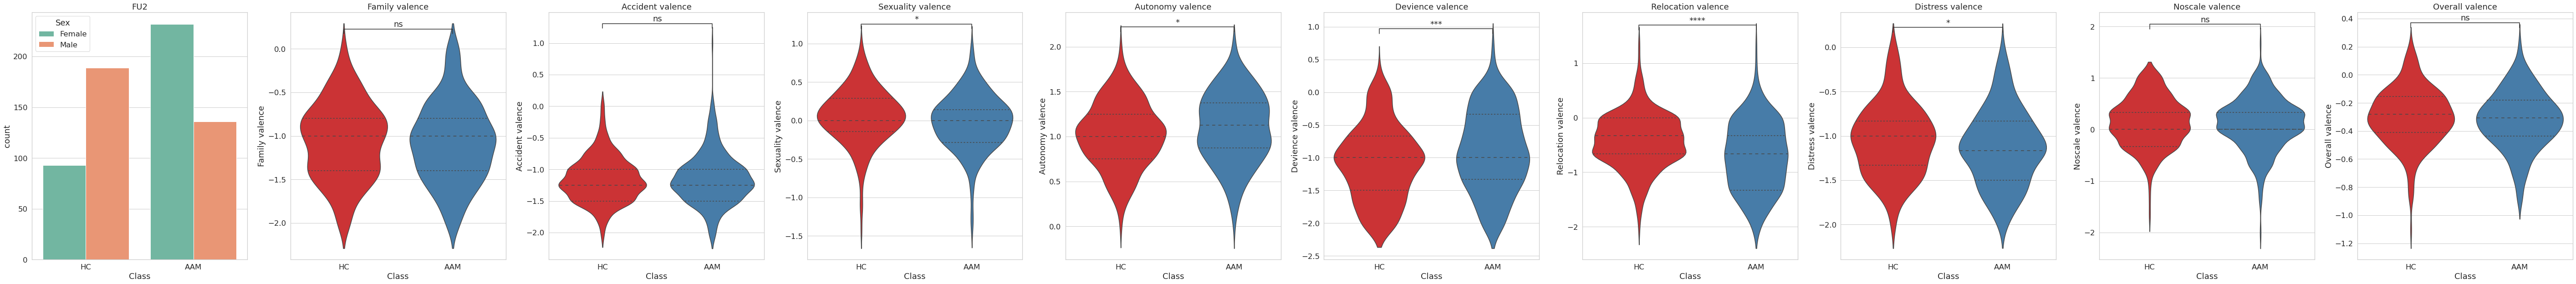

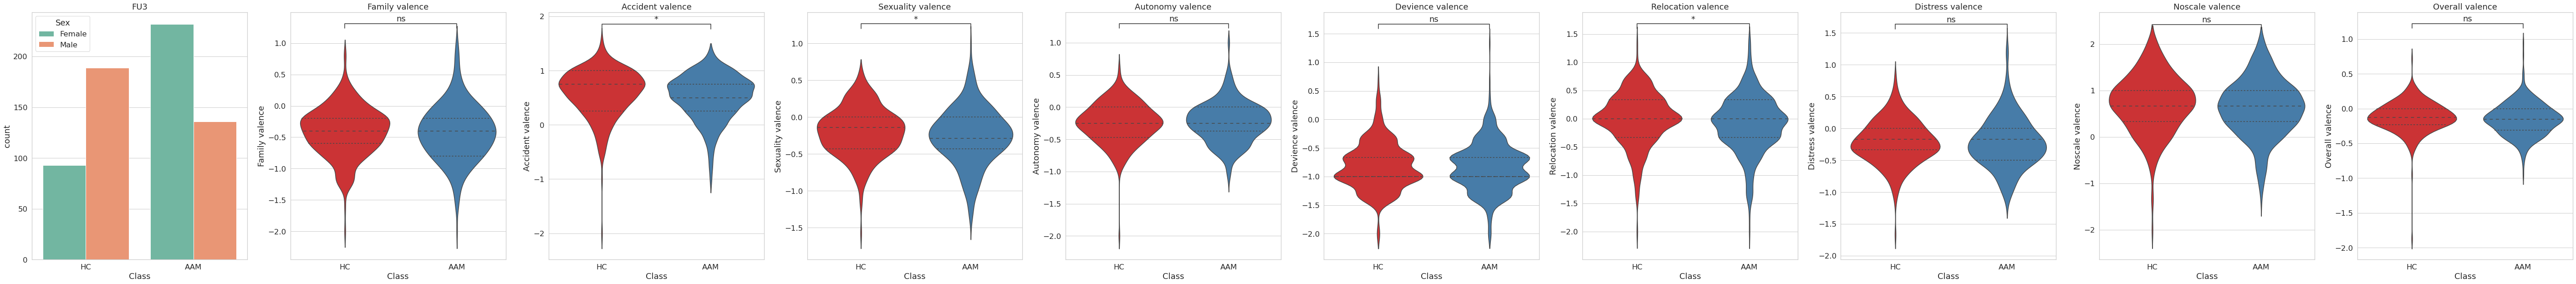

In [9]:
# session plot
for (S, DF) in [('BL', binge_LEQ_BL),('FU1', binge_LEQ_FU1),
                ('FU2', binge_LEQ_FU2),('FU3', binge_LEQ_FU3)]:
    columns = col_binge_LEQ[:9]
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

In [10]:
df_binge_LEQ.groupby(['Session','Class'])[col_binge_LEQ[:9]].mean()

Family valence  Accident valence  Sexuality valence  \
Session Class                                                        
BL      AAM         -1.137017         -1.226519           0.007893   
        HC          -1.130935         -1.191547          -0.025180   
FU1     AAM         -1.065806         -1.066129           0.032258   
        HC          -1.071130         -1.073222           0.060968   
FU2     AAM         -1.074448         -1.145110          -0.019378   
        HC          -1.057255         -1.154902           0.056022   
FU3     AAM         -0.420163          0.508174          -0.263527   
        HC          -0.409220          0.583333          -0.201114   

               Autonomy valence  Devience valence  Relocation valence  \
Session Class                                                           
BL      AAM            1.047307         -0.959484           -0.364641   
        HC             0.953237         -1.031175           -0.386091   
FU1     AAM            1.069355         -0.794624           -0.641935   
        HC             1.006799         -1.009763           -0.531381   
FU2     AAM            1.092271         -0.895899           -0.706625   
        HC             1.018627         -1.078431           -0.427451   
FU3     AAM           -0.232629         -0.827430           -0.089918   
        HC            -0.248227         -0.816785           -0.005910   

               Distress valence  Noscale valence  Overall valence  
Session Class                                                      
BL      AAM           -1.151934         0.151934        -0.322709  
        HC            -1.033573         0.170264        -0.331120  
FU1     AAM           -1.102688         0.126882        -0.291232  
        HC            -1.061367         0.119944        -0.302543  
FU2     AAM           -1.128286         0.111462        -0.322899  
        HC            -1.048366         0.142484        -0.301156  
FU3     AAM           -0.217984         0.630336        -0.152379  
        HC            -0.216312         0.722222        -0.120658

In [11]:
# df_binge_LEQ.columns = df_binge_LEQ.columns.str.replace(' ','_')

#### Session with Class in Mean Frequency

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=3.548e-03 stat=-2.927e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=7.393e-01 stat=-3.329e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=6.046e-02 stat=-1.881e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with

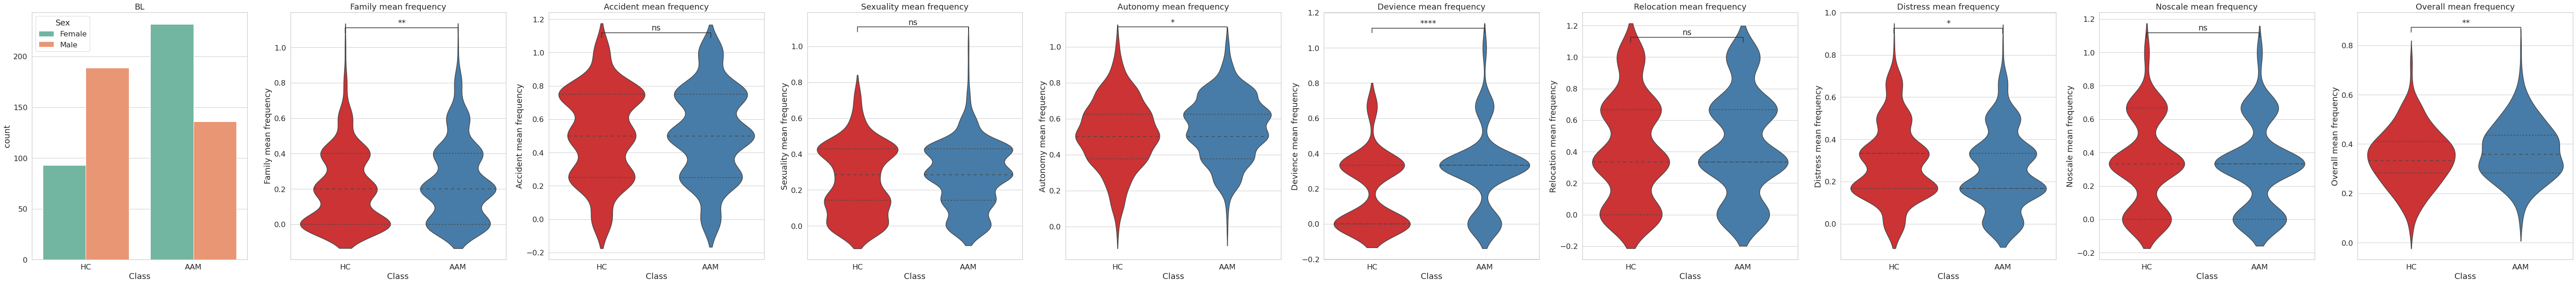

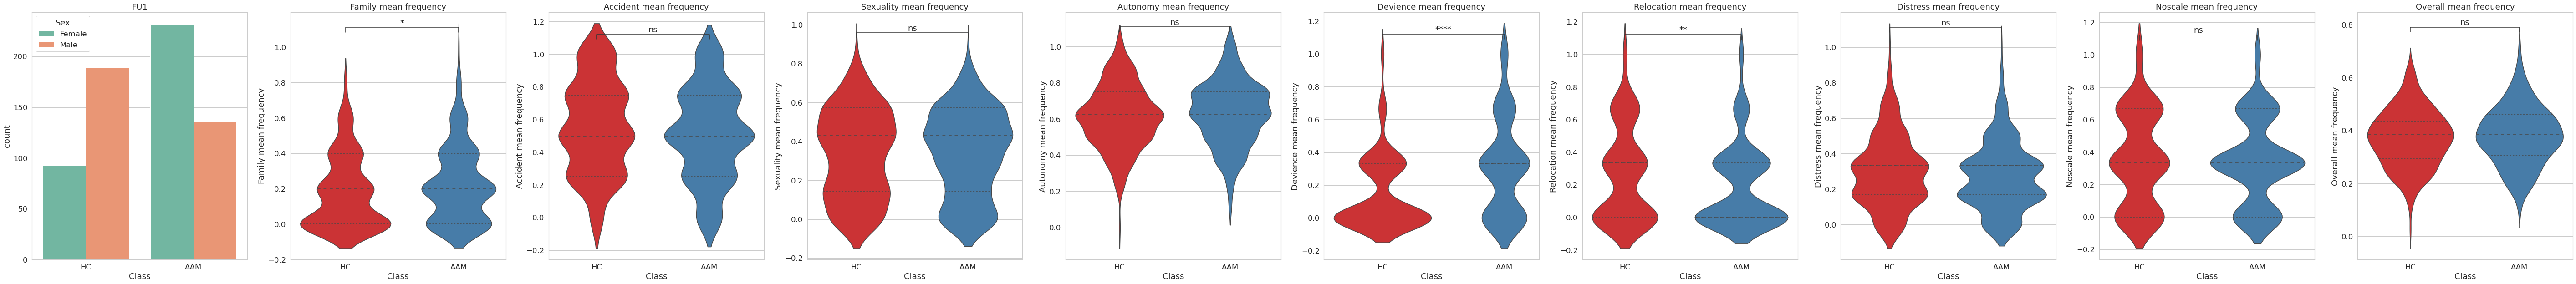

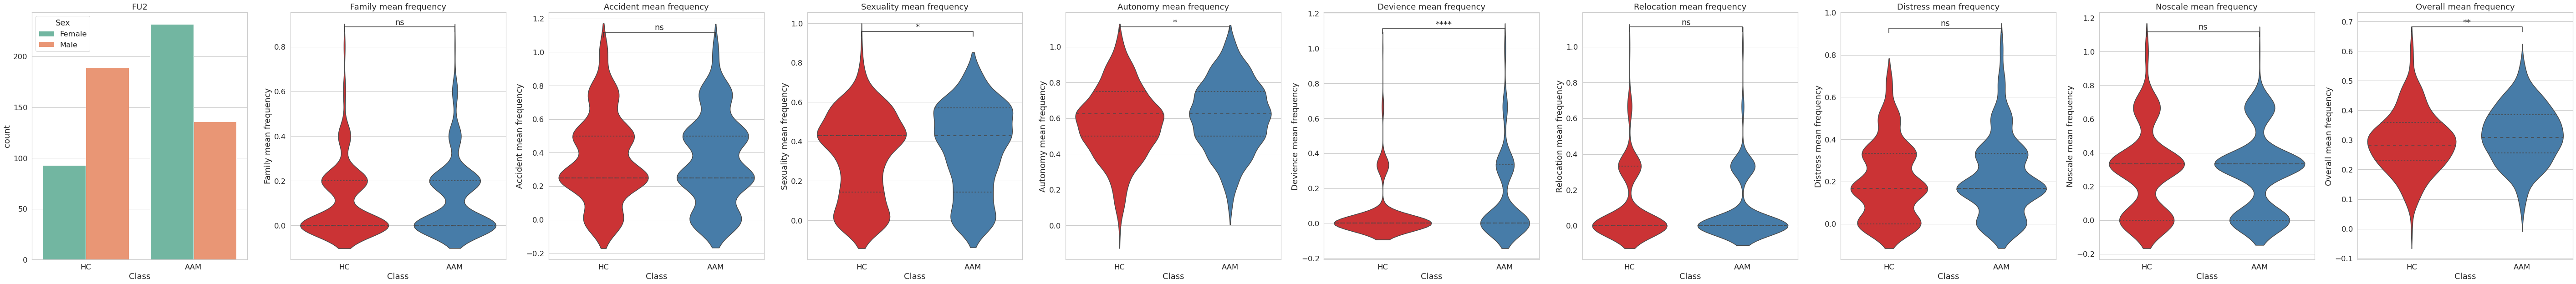

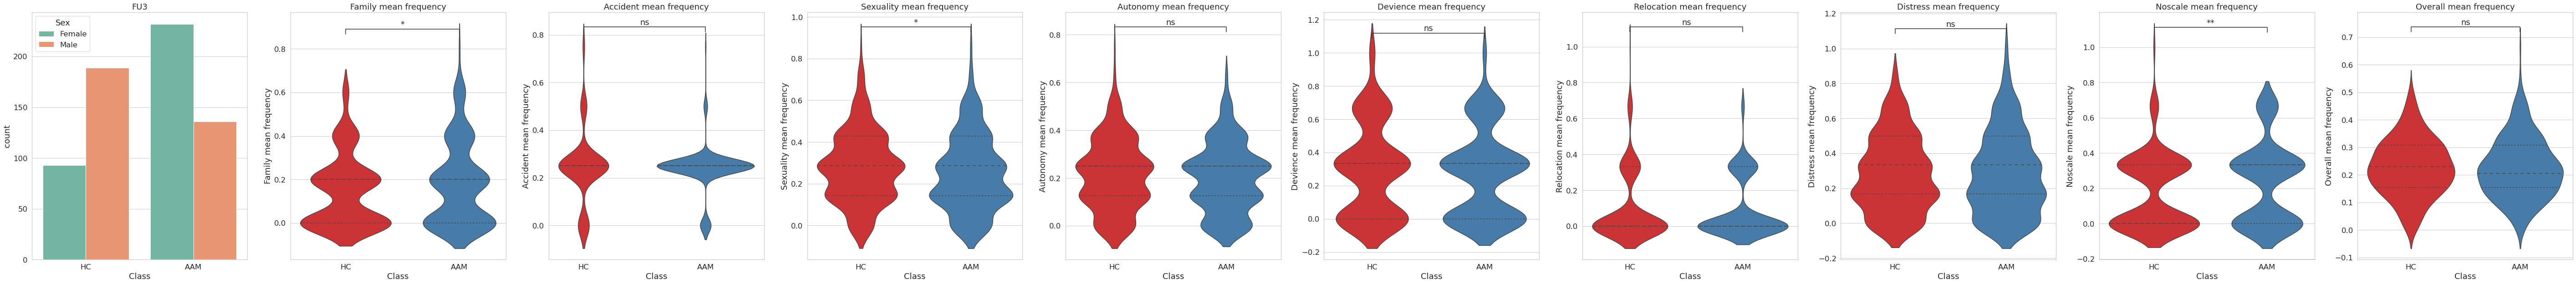

In [12]:
# session plot
for (S, DF) in [('BL', binge_LEQ_BL),('FU1', binge_LEQ_FU1),
                ('FU2', binge_LEQ_FU2),('FU3', binge_LEQ_FU3)]:
    columns = col_binge_LEQ[9:18]
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

In [13]:
df_binge_LEQ.groupby(['Session','Class'])[col_binge_LEQ[9:18]].mean()

Family mean frequency  Accident mean frequency  \
Session Class                                                   
BL      AAM                 0.250276                 0.517956   
        HC                  0.200000                 0.510791   
FU1     AAM                 0.226452                 0.512903   
        HC                  0.181590                 0.554393   
FU2     AAM                 0.123659                 0.354890   
        HC                  0.109804                 0.366667   
FU3     AAM                 0.182016                 0.237057   
        HC                  0.146809                 0.245567   

               Sexuality mean frequency  Autonomy mean frequency  \
Session Class                                                      
BL      AAM                    0.284136                 0.551796   
        HC                     0.256423                 0.516187   
FU1     AAM                    0.339631                 0.631048   
        HC                     0.333533                 0.611925   
FU2     AAM                    0.362325                 0.611199   
        HC                     0.323810                 0.571078   
FU3     AAM                    0.250681                 0.201975   
        HC                     0.280142                 0.214982   

               Devience mean frequency  Relocation mean frequency  \
Session Class                                                       
BL      AAM                   0.314917                   0.446593   
        HC                    0.188249                   0.412470   
FU1     AAM                   0.312903                   0.197849   
        HC                    0.152022                   0.266388   
FU2     AAM                   0.140904                   0.088328   
        HC                    0.049673                   0.107190   
FU3     AAM                   0.277929                   0.095368   
        HC                    0.296690                   0.102837   

               Distress mean frequency  Noscale mean frequency  \
Session Class                                                    
BL      AAM                   0.254604                0.323204   
        HC                    0.290767                0.336930   
FU1     AAM                   0.273656                0.344086   
        HC                    0.301255                0.357043   
FU2     AAM                   0.223975                0.280757   
        HC                    0.205882                0.288889   
FU3     AAM                   0.286558                0.236149   
        HC                    0.284870                0.182033   

               Overall mean frequency  
Session Class                          
BL      AAM                  0.372007  
        HC                   0.346799  
FU1     AAM                  0.379901  
        HC                   0.371527  
FU2     AAM                  0.316347  
        HC                   0.292911  
FU3     AAM                  0.225040  
        HC                   0.226950

#### BL

In [14]:
# DF = binge_LEQ_BL
# stat_binge_BL_LEQ = IMAGEN_inference(DF, col_binge_LEQ)
# stat_binge_BL_LEQ.violinplot()
# stat_binge_BL_LEQ.inference_statistics()
# stat_binge_BL_LEQ.demographic_plot()

#### FU1

In [15]:
# DF = binge_LEQ_FU1
# stat_binge_FU1_LEQ = IMAGEN_inference(DF, col_binge_LEQ)
# stat_binge_FU1_LEQ.violinplot()
# stat_binge_FU1_LEQ.inference_statistics()
# stat_binge_FU1_LEQ.demographic_plot()

#### FU2

In [16]:
# DF = binge_LEQ_FU2
# stat_binge_FU2_LEQ = IMAGEN_inference(DF, col_binge_LEQ)
# stat_binge_FU2_LEQ.violinplot()
# stat_binge_FU2_LEQ.inference_statistics()
# stat_binge_FU2_LEQ.demographic_plot()

#### FU3

In [17]:
# DF = binge_LEQ_FU3
# stat_binge_FU3_LEQ = IMAGEN_inference(DF, col_binge_LEQ)
# stat_binge_FU3_LEQ.violinplot()
# stat_binge_FU3_LEQ.inference_statistics()
# stat_binge_FU3_LEQ.demographic_plot()

[Back to the LEQ](#LEQ)

[Back to the top](#Socio_economic_profile)

<h2>PBQ</h2>
Pregnancy and Birth Questionnaire (PBQ); self-report

In [18]:
PBQ = IMAGEN_instrument()
binge_PBQ = PBQ.read_instrument(
    'newlbls-fu3-espad-fu3-19a-binge-n650_PBQ.csv'
)
col_binge_PBQ = binge_PBQ.columns[:-6]

In [19]:
binge_PBQ.groupby(['Class'])['pbq_03'].value_counts()

Class  pbq_03       
AAM    Yes              205
       No               146
       not available      1
       not known          1
HC     Yes              128
       No               127
Name: pbq_03, dtype: int64

In [20]:
# Relative frequency needed

In [21]:
# pd.crosstab([binge_PBQ.pbq_03a,binge_PBQ.pbq_03c], [binge_PBQ.pbq_03, binge_PBQ.Class], margins=True)

In [22]:
binge_PBQ.groupby(['Class'])['pbq_13'].value_counts()

Class  pbq_13       
AAM    No               240
       Yes              111
       not available      1
       not known          1
HC     No               218
       Yes               36
       not known          1
Name: pbq_13, dtype: int64

In [23]:
pd.crosstab([binge_PBQ.pbq_13a,binge_PBQ.pbq_13g], [binge_PBQ.pbq_13,binge_PBQ.Class], margins=True)

pbq_13                                      Yes      All
Class                                       AAM  HC     
pbq_13a                   pbq_13g                       
Monthly or less           first and second    2   0    2
                          first and third     1   0    1
                          first trimester    17   4   21
                          not available       0   4    4
                          not known           5   2    7
                          second and third    5   3    8
                          second trimester    3   1    4
                          third trimester    11   1   12
                          whole pregnancy    14   7   21
Two to four times a month first and second    6   2    8
                          first trimester     3   1    4
                          not available       0   1    1
                          not known           2   0    2
                          second and third    6   3    9
                          second trimester    2   0    2
                          third trimester     3   0    3
                          whole pregnancy    21   5   26
Two to three times a week second trimester    1   0    1
                          whole pregnancy     3   0    3
not available             first and second    1   0    1
                          whole pregnancy     2   0    2
not known                 first and second    1   0    1
                          first trimester     1   2    3
                          whole pregnancy     1   0    1
All                                         111  36  147

In [24]:
# cross = pd.crosstab([binge_PBQ.pbq_13a,binge_PBQ.pbq_13g], [binge_PBQ.pbq_13,binge_PBQ.Class], margins=True)

In [25]:
# plt.figure(figsize=(8, 6))
# sns.heatmap(cross, annot=False)
# plt.show()

In [26]:
# df_binge_PBQ.dropna(thresh=7)[col_binge_PBQ]

[Back to the PBQ](#PBQ)

[Back to the top](#Socio_economic_profile)

<h2>CTS</h2>
Conflict Tactics Scale (CTS)

In [27]:
CTS = IMAGEN_instrument()
binge_CTS = CTS.read_instrument(
    'newlbls-fu3-espad-fu3-19a-binge-n650_CTS.csv'
)
col_binge_CTS = binge_CTS.columns[:-6]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=6.123e-01 stat=-5.071e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=7.025e-01 stat=3.822e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with Bonferroni correction, P_val=4.131e-02 stat=-2.045e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HC v.s. AAM: t-test independent samples with 

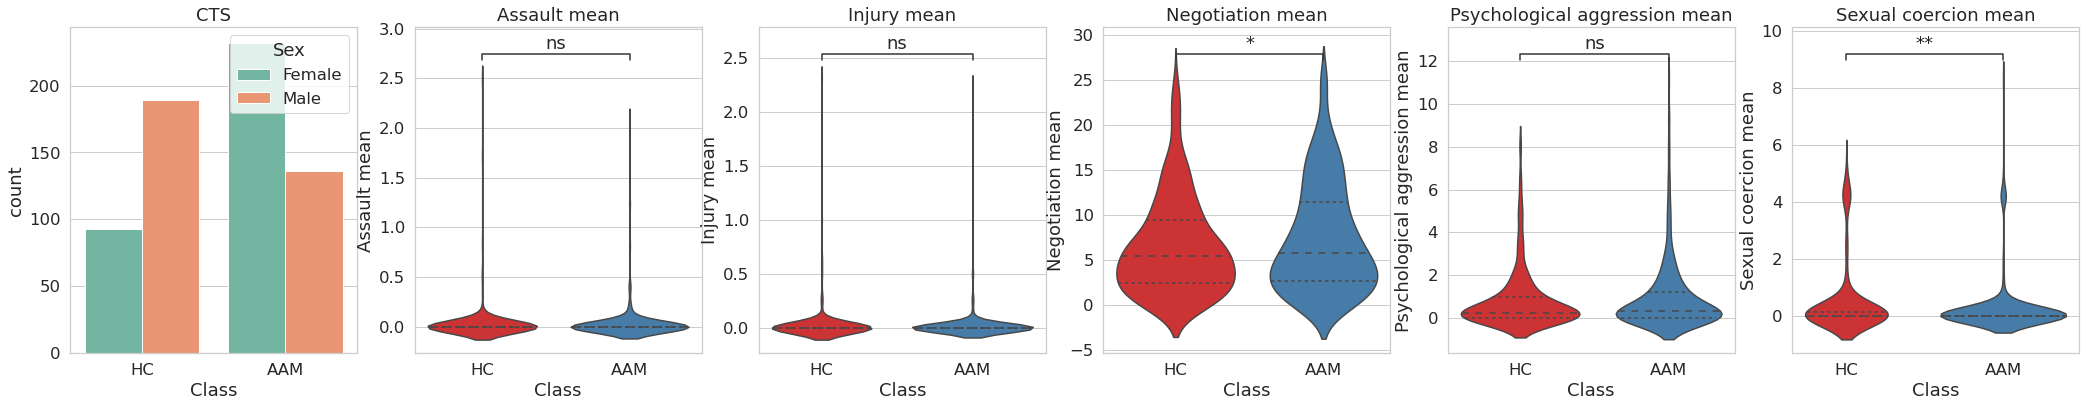

In [28]:
# session plot
for (S, DF) in [('CTS', binge_CTS)]:
    columns = col_binge_CTS
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=1, ncols=len(columns)+1,
                             figsize=((len(columns)+1)**2, len(columns)+1))
    sns.countplot(x="Class", hue='Sex', order=['HC', 'AAM'], data = DF,
                  ax = axes[0], palette="Set2").set(title=S)
    
    for i, j in enumerate(columns):
        axes[i+1].set_title(columns[i])
        sns.violinplot(x="Class", y=j, data=DF, order=['HC', 'AAM'],
                       inner="quartile", ax = axes[i+1], palette="Set1")
        add_stat_annotation(ax = axes[i+1], data=DF, x="Class", y=j,
                            box_pairs = [("HC","AAM")], order=["HC","AAM"],
                            test='t-test_ind', text_format='star', loc='inside') 

In [29]:
binge_CTS.groupby(['Class'])[col_binge_CTS].mean()

,Assault mean,Injury mean,Negotiation mean,Psychological aggression mean,Sexual coercion mean
Class,,,,,
AAM,0.036812,0.020601,7.489991,0.960545,0.255587
HC,0.028990,0.025412,6.546703,0.850046,0.529304


[Back to the CTS](#CTS)

[Back to the top](#Socio_economic_profile)

<h2>GEN</h2>
Genetics Screening and Family History of Psychiatric Disorders Interview (GEN)

In [30]:
GEN = IMAGEN_instrument()
binge_GEN = GEN.read_instrument(
    'newlbls-fu3-espad-fu3-19a-binge-n650_GEN.csv'
)
col_binge_GEN = binge_GEN.columns[:-6]

### Disorder

In [31]:
binge_GEN.groupby(['Session','Class'])[col_binge_GEN].count()

Paternal_disorder  Maternal_disorder
Session Class                                      
BL      AAM                   41                 40
        HC                    23                 22

In [32]:
binge_GEN.groupby(['Class','Sex']).count()

Paternal_disorder  Maternal_disorder  Session   ID  Data  Site
Class Sex                                                                   
AAM   Female                 26                 28      232  232   232   232
      Male                   15                 12      136  136   136   136
HC    Female                  9                 12       93   93    93    93
      Male                   14                 10      189  189   189   189

### Alcohol and Drug

In [33]:
# binge_GEN.query('Maternal_disorder.str.contains("Alcohol|Drug", na=False)', engine='python')

In [34]:
df = binge_GEN.query('Maternal_disorder.str.contains("Alcohol|Drug", na=False)', engine='python')

In [35]:
df.groupby('Sex').count()

,Paternal_disorder,Maternal_disorder,Session,ID,Data,Site,Class
Sex,,,,,,,
Female,4,13,13,13,13,13,13
Male,3,8,8,8,8,8,8


In [36]:
binge_GEN.query('Paternal_disorder.str.contains("Alcohol|Drug", na=False)', engine='python')

,Paternal_disorder,Maternal_disorder,Session,ID,Data,Sex,Site,Class
9,"Major Depression recurrent,Alcohol problems",NaN,BL,1647364,newlbls-fu3-espad-fu3-19a-binge-n650,Female,Dresden,AAM
63,Alcohol problems,Other,BL,10482778,newlbls-fu3-espad-fu3-19a-binge-n650,Female,Hamburg,AAM
140,"Drug problems,Eating Disorder,Major Depression...",Bipolar I Disorder,BL,22245441,newlbls-fu3-espad-fu3-19a-binge-n650,Female,London,AAM
241,Alcohol problems,Suicide / Suicidal Attempt,BL,36043675,newlbls-fu3-espad-fu3-19a-binge-n650,Female,Mannheim,AAM


[Back to the GEN](#GEN)

[Back to the top](#Socio_economic_profile)